In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataframe/champions.csv')
df.head()

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,121,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,122,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,123,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,124,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,125,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387


In [3]:
# Crea una nueva columna para almacenar la fase en la que se quedó el equipo 1
df['Posicion'] = ''

# Itera sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Obtiene la temporada y el equipo local de esta fila
    temporada = row['Temporada']
    equipo_local = row['Local']
    
    # Filtra el DataFrame para encontrar todas las filas de la misma temporada donde el equipo local aparezca
    partidos_equipo_local = df[(df['Temporada'] == temporada) & ((df['Local'] == equipo_local) | (df['Visitante'] == equipo_local))]
    
    # Encuentra la última fila donde el equipo local haya participado en esta temporada
    ultima_fila_equipo_local = partidos_equipo_local.index.max()
    
    # Si no hay partidos registrados para el equipo local en esta temporada, continúa con la siguiente fila
    if pd.isnull(ultima_fila_equipo_local):
        continue
    
    # Obtiene la ronda de la última aparición del equipo local en esta temporada
    ronda_ultima_aparicion = df.loc[ultima_fila_equipo_local, 'Ronda']
    
    # Si la ronda es 'Final', determinar si el equipo local ganó
    if ronda_ultima_aparicion == 'Final':
        # Verificamos si el equipo local es el ganador
        if equipo_local == df.loc[ultima_fila_equipo_local, 'Local'] and df.loc[ultima_fila_equipo_local, 'VictoriaLocal'] == 1:
            df.at[index, 'Posicion'] = 'Winner'
        elif equipo_local == df.loc[ultima_fila_equipo_local, 'Visitante'] and df.loc[ultima_fila_equipo_local, 'VictoriaVisitante'] == 1:
            df.at[index, 'Posicion'] = 'Final'
        else:
            df.at[index, 'Posicion'] = 'Final'
    else:
        # Asigna la ronda al partido actual en la nueva columna Posicion
        df.at[index, 'Posicion'] = ronda_ultima_aparicion



df.head()



,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
0,121,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422,Group stage
1,122,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148,Round of 16
2,123,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168,Group stage
3,124,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874,Quarter-finals
4,125,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387,Group stage


In [4]:
# Primero, seleccionamos las filas correspondientes a la temporada 2011-01-01 donde el local es el equipo 11
filas_actualizar = df[(df['Temporada'] == '2011-01-01') & (df['Local'] == 11)]
# Luego, actualizamos la columna 'Posición' en estas filas con el valor 'Winner'
df.loc[filas_actualizar.index, 'Posicion'] = 'Winner'

# Seleccionamos las filas correspondientes a la temporada 2015-01-01 donde el local es el equipo 1
filas_actualizar_2015 = df[(df['Temporada'] == '2015-01-01') & (df['Local'] == 1)]
# Actualizamos la columna 'Posición' en estas filas con el valor 'Winner'
df.loc[filas_actualizar_2015.index, 'Posicion'] = 'Winner'

# Seleccionamos las filas correspondientes a la temporada 2007-01-01 donde el local es el equipo 8
filas_actualizar_2007 = df[(df['Temporada'] == '2007-01-01') & (df['Local'] == 8)]
# Actualizamos la columna 'Posición' en estas filas con el valor 'Winner'
df.loc[filas_actualizar_2007.index, 'Posicion'] = 'Winner'

# Seleccionamos las filas correspondientes a la temporada 2004-01-01 donde el local es el equipo 4
filas_actualizar_2004 = df[(df['Temporada'] == '2004-01-01') & (df['Local'] == 4)]
# Actualizamos la columna 'Posición' en estas filas con el valor 'Winner'
df.loc[filas_actualizar_2004.index, 'Posicion'] = 'Winner'

filas_actualizar_2004


,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
2254,2375,2004-01-01,Group stage,4,27,Anfield,2,0,1,0,...,57.14,75.00,0.00,25.00,0.57,0.75,1.43,508.355750,25.417787,Final
2276,2397,2004-01-01,Group stage,4,61,Anfield,0,0,0,1,...,0.00,0.00,33.33,66.67,0.00,0.00,0.00,407.353721,19.397796,Final
2332,2453,2004-01-01,Group stage,4,85,Anfield,3,1,1,0,...,60.00,100.00,0.00,0.00,0.60,1.00,0.80,396.334285,20.859699,Final
2342,2463,2004-01-01,Round of 16,4,37,Anfield,3,1,1,0,...,42.86,75.00,0.00,25.00,0.43,0.75,2.00,510.009492,24.286166,Final
2356,2477,2004-01-01,Quarter-finals,4,9,Anfield,2,1,1,0,...,66.67,80.00,20.00,0.00,0.67,0.80,0.89,637.608076,28.982185,Final
2366,2487,2004-01-01,Semi-finals,4,11,Anfield,1,0,1,0,...,54.55,66.67,33.33,0.00,0.55,0.67,1.91,740.538632,32.197332,Final


### Multiclass classifier 1X2

In [5]:
df = df.drop(['Temporada', 'Ronda', 'Evento'], axis=1)
df.head()

,idPartido,Local,Visitante,GolesLocal,GolesVisitante,VictoriaLocal,Empate,VictoriaVisitante,%_Victorias_Local,%_Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
0,121,235,11,1,0,1,0,0,100.0,0.0,...,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422,Group stage
1,122,14,153,3,0,1,0,0,0.0,100.0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148,Round of 16
2,123,15,1,0,3,0,0,1,100.0,0.0,...,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168,Group stage
3,124,10,298,2,0,1,0,0,0.0,0.0,...,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874,Quarter-finals
4,125,184,2,1,1,0,1,0,100.0,0.0,...,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387,Group stage


### Visualización de mi variable objetivo

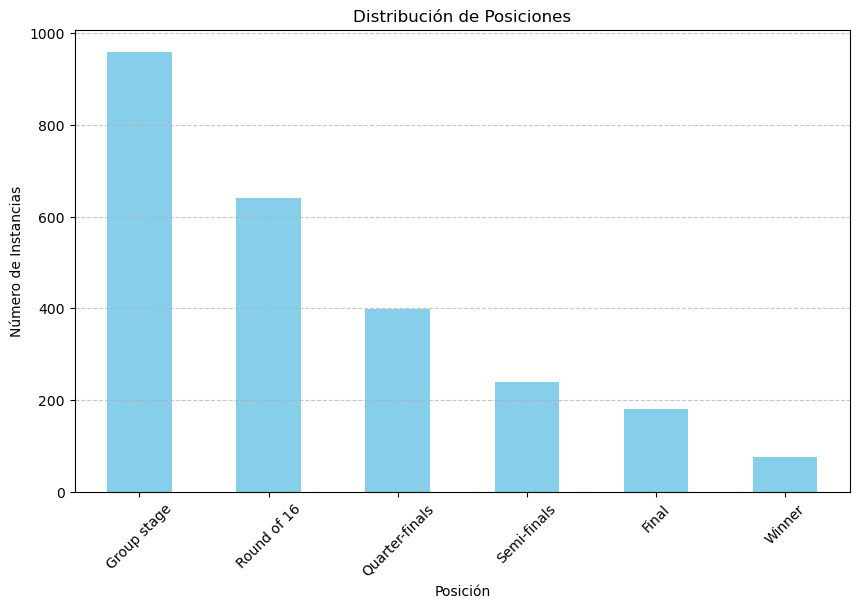

Conteo de instancias para cada posición:
Posicion
Group stage       960
Round of 16       640
Quarter-finals    399
Semi-finals       239
Final             181
Winner             75
Name: count, dtype: int64


In [6]:
# Contar el número de instancias para cada posición
conteo_posiciones = df['Posicion'].value_counts()

# Visualizar la distribución de las clases en un gráfico de barras
plt.figure(figsize=(10, 6))
conteo_posiciones.plot(kind='bar', color='skyblue')
plt.title('Distribución de Posiciones')
plt.xlabel('Posición')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Imprimir el conteo de instancias para cada posición
print("Conteo de instancias para cada posición:")
print(conteo_posiciones)

### Modelos

In [7]:
from sklearn.model_selection import train_test_split

partido_features = df.drop(['Posicion', 'GolesLocal', 'GolesVisitante', 'VictoriaLocal', 'VictoriaVisitante', 'Empate'], axis=1).columns
objetivo = 'Posicion'

# Separate features and labels
partidos_X = df[partido_features].values
partidos_y = df[objetivo].values


# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(partidos_X, partidos_y,
                                                    test_size=0.30,
                                                    random_state=0,
                                                    stratify=partidos_y)

print ('Training Set: %d, Test Set: %d \n' % (x_train.shape[0], x_test.shape[0]))

Training Set: 1745, Test Set: 749 



### Regresión logística

In [8]:
from sklearn.linear_model import LogisticRegression

def run_model(x_train, x_test, y_train, y_test):
    lr_basico = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    lr_basico.fit(x_train, y_train)
    return lr_basico

multi_model = run_model(x_train, x_test, y_train, y_test)

In [9]:
from sklearn. metrics import classification_report

# Realizar predicciones en el conjunto de prueba
predictions = multi_model.predict(x_test)

# Imprimir las etiquetas predichas y las etiquetas reales para las primeras 15 muestras del conjunto de prueba
print('Etiquetas predichas:', predictions[:15])
print('Etiquetas reales:   ', y_test[:15])

Etiquetas predichas: ['Round of 16' 'Round of 16' 'Semi-finals' 'Final' 'Winner' 'Group stage'
 'Group stage' 'Group stage' 'Group stage' 'Final' 'Round of 16'
 'Group stage' 'Round of 16' 'Semi-finals' 'Group stage']
Etiquetas reales:    ['Round of 16' 'Round of 16' 'Final' 'Final' 'Winner' 'Group stage'
 'Group stage' 'Group stage' 'Group stage' 'Final' 'Round of 16'
 'Group stage' 'Round of 16' 'Semi-finals' 'Group stage']


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))


Overall Accuracy: 0.9225634178905207
Overall Precision: 0.8244110980134524
Overall Recall: 0.8112620772946859


                precision    recall  f1-score   support

         Final       0.62      0.61      0.62        54
   Group stage       0.99      1.00      0.99       288
Quarter-finals       0.91      0.95      0.93       120
   Round of 16       0.98      0.97      0.97       192
   Semi-finals       0.81      0.82      0.81        72
        Winner       0.63      0.52      0.57        23

      accuracy                           0.92       749
     macro avg       0.82      0.81      0.82       749
  weighted avg       0.92      0.92      0.92       749



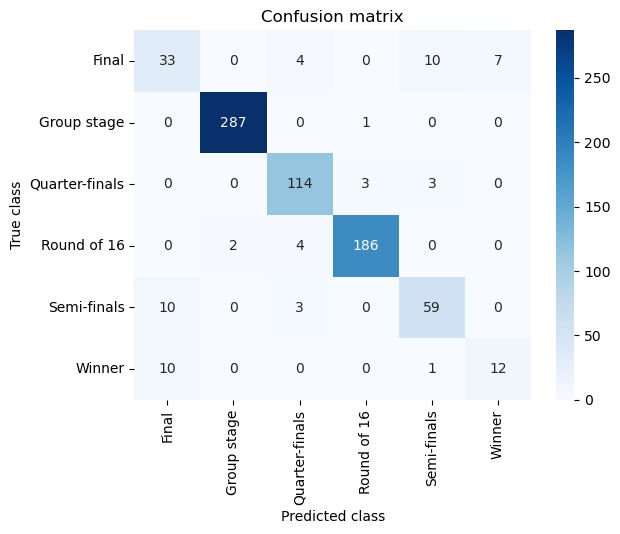

In [11]:
from sklearn.metrics import confusion_matrix

posicion_classes = ['Final', 'Group stage', 'Quarter-finals', 'Round of 16', 'Semi-finals', 'Winner']

def mostrar_resultados(y_test, pred_y):
    print (classification_report(y_test, pred_y))
    conf_matrix = confusion_matrix(y_test, pred_y)
    sns.heatmap(conf_matrix, cmap='Blues', xticklabels=posicion_classes, yticklabels=posicion_classes, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    
mostrar_resultados(y_test, predictions)

La clase "Final" parece tener un bajo recall y precisión, lo que indica que el modelo tiene dificultades para identificar correctamente esta clase. Por otro lado, la clase "Group stage" tiene un rendimiento muy alto en términos de precisión, recall y F1-score.

En el caso de un modelo de clasificación multiclase, no es posible mostrar una única curva ROC que muestre la tasa de verdaderos positivos frente a la tasa de falsos positivos. Sin embargo, puedes utilizar las tasas para cada clase en una comparación Uno vs. Resto (OVR) para crear un gráfico ROC para cada clase.

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

'''
# Obtener las probabilidades de clase
partidos_prob = multi_model.predict_proba(x_test)

def plot_multiclass_roc(model, y_test, classes=None):
     # Obtener métricas ROC para cada clase
    fpr = {}
    tpr = {}
    thresh = {}
    for i in range(len(model.classes_)):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
    # Trazar la curva ROC
    for i in range(len(model.classes_)):
        plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))
    
    # Añadir etiquetas y leyenda
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    
    # Añadir etiquetas de clase si se proporcionan
    if classes:
        plt.xticks(range(len(classes)), classes)
    
    # Mostrar la gráfica
    plt.show()

# Usar la función para plotear la curva ROC
plot_multiclass_roc(multi_model, x_test, y_test)

auc = roc_auc_score(y_test, partidos_prob, multi_class='ovr')
print('Average AUC:', auc)'''

"\n# Obtener las probabilidades de clase\npartidos_prob = multi_model.predict_proba(x_test)\n\ndef plot_multiclass_roc(model, y_test, classes=None):\n     # Obtener métricas ROC para cada clase\n    fpr = {}\n    tpr = {}\n    thresh = {}\n    for i in range(len(model.classes_)):    \n        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)\n    \n    # Trazar la curva ROC\n    for i in range(len(model.classes_)):\n        plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))\n    \n    # Añadir etiquetas y leyenda\n    plt.title('Multiclass ROC curve')\n    plt.xlabel('False Positive Rate')\n    plt.ylabel('True Positive Rate')\n    plt.legend(loc='best')\n    \n    # Añadir etiquetas de clase si se proporcionan\n    if classes:\n        plt.xticks(range(len(classes)), classes)\n    \n    # Mostrar la gráfica\n    plt.show()\n\n# Usar la función para plotear la curva ROC\nplot_multiclass_roc(multi_model, x_test, y_test)\n\nauc = ro

Dibujar las curvas ROC nos da problemas por el desbalanceo de las clases. Promedio de los AUC obtenidos para cada clase individualmente mediante un enfoque OVR, en este caso sugiere que el modelo tiene un buen rendimiento en términos de capacidad discriminativa en general. Las métricas de evaluación son aparentemente buenas pero vemos que los resultados estan muy desbalanceados. Vamos a tratar de buscar la mejor estrategia para mejorar este desbalanceo ya que a la hora de predecir esto puede ser un problema.

                precision    recall  f1-score   support

         Final       0.71      0.59      0.65        54
   Group stage       0.99      1.00      1.00       288
Quarter-finals       0.90      0.94      0.92       120
   Round of 16       0.98      0.96      0.97       192
   Semi-finals       0.80      0.79      0.80        72
        Winner       0.57      0.74      0.64        23

      accuracy                           0.92       749
     macro avg       0.83      0.84      0.83       749
  weighted avg       0.92      0.92      0.92       749



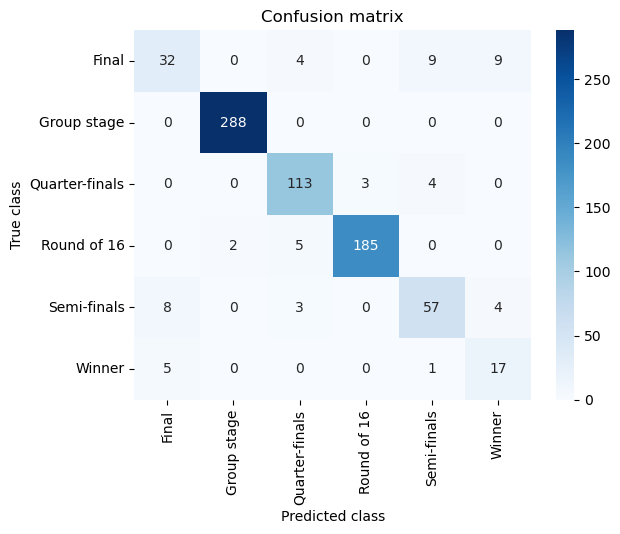

In [13]:
'''Estrategia de penalización'''

def run_model_balanced(x_train, x_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(x_train, y_train)
    return clf
 
model_LR_penalizacion = run_model_balanced(x_train, x_test, y_train, y_test)
pred_y = model_LR_penalizacion.predict(x_test)
mostrar_resultados(y_test, pred_y)

- El modelo con penalización parece ser superior en términos de precisión y recall en comparación con el modelo sin penalización.
- El modelo con penalización generalmente tiene un mejor desempeño en la clasificación de casos positivos, especialmente en la clase "Winner".

Ambos modelos tienen un buen rendimiento general, pero el modelo con penalización es más robusto y equilibrado en la clasificación de las diferentes clases. Debemos considerar el uso del modelo con penalización para obtener resultados más confiables y consistentes en la clasificación de las diferentes clases en este problema específico.

In [22]:
'''Subsampling en la clase mayoritaria'''
from imblearn.under_sampling import near_miss
from collections import Counter

# Realizar el submuestreo en la clase mayoritaria utilizando NearMiss
x_train_res, y_train_res = near_miss.fit_resample(x_train, y_train)

# Imprimir la distribución antes y después del submuestreo
print("Distribución antes del submuestreo: {}".format(Counter(y_train)))
print("Distribución después del submuestreo: {}".format(Counter(y_train_res)))

# Entrenar el modelo con los datos submuestreados
model = run_model(x_train_res, x_test, y_train_res, y_test)

# Realizar predicciones y mostrar los resultados
pred_y = model.predict(x_test)
mostrar_resultados(y_test, pred_y)


ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/imblearn/utils/_validation.py)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = random_forest_model.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Mostrar el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

# Obtener las probabilidades de clase
partidos_prob = random_forest_model.predict_proba(x_test)

'''#Curva ROC
plot_multiclass_roc(random_forest_model, x_test, y_test)
'''

: 

Con este modelo vemos que los resultados mejoran. Ahora voy a probar con Gradient Boosting este modelo puede ser bueno para mi trabajo.

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


#Inicializar el modelo Gradient Boosting con los pesos de muestra
modelo_gb = GradientBoostingClassifier(n_estimators=100)

# Ajustar el modelo Gradient Boosting con los pesos de muestra
modelo_gb.fit(x_train, y_train)

# Realizar predicciones
predicciones = modelo_gb.predict(x_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Accuracy:", precision)

# Mostrar el informe de clasificación
print("Classification Report:\n", classification_report(y_test, predicciones))

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

# Obtener las probabilidades de clase
partidos_prob = modelo_gb.predict_proba(x_test)

'''#Curva ROC
plot_multiclass_roc(modelo_gb, x_test, y_test)'''


: 

### Preprocesamiento de los datos

Escalaré los datos con un pipeline y utilizaré los mismo modelos anteriores a ver si mis resultados mejoran. Además también utilizaré SVM, un algoritmo de aprendizaje supervisado. Su objetivo principal en la clasificación es encontrar un hiperplano en un espacio multidimensional que separe de la mejor manera posible las diferentes clases de datos. Este hiperplano se define de manera que maximiza la distancia entre los puntos más cercanos de las clases, conocidos como vectores de soporte.

In [ ]:
df.head()

: 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

columnas_a_escalar = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, columnas_a_escalar)])

#pipeline con svc
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


multi_model_SVC = pipeline.fit(x_train, y_train)
print (multi_model_SVC)


: 

In [ ]:
#Evaluación del modelo SVC con pipeline
# Get predictions from test data
predictions = multi_model_SVC.predict(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

partidos_prob = multi_model_SVC.predict_proba(x_test)

'''#Curva ROC
plot_multiclass_roc(modelo_gb, x_test, y_test)'''

: 

In [ ]:
#pipeline con random forest
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=4, random_state=42))])

multi_model_RF = pipeline.fit(x_train, y_train)
print (multi_model_RF)

#Evaluación del modelo Random Forest con pipeline
# Get predictions from test data
predictions = multi_model_RF.predict(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

partidos_prob = multi_model_RF.predict_proba(x_test)

'''#Curva ROC
plot_multiclass_roc(modelo_gb, x_test, y_test)'''


: 

In [ ]:
#pipeline con gradient boosting
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingClassifier())])

multi_model_GB = pipeline.fit(x_train, y_train)
print (multi_model_GB)

#Evaluación del modelo Gradient Boosting con pipeline
# Get predictions from test data
predictions = multi_model_GB.predict(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))


# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

partidos_prob_prob = multi_model_GB.predict_proba(x_test)

'''#Curva ROC
plot_multiclass_roc(modelo_gb, x_test, y_test)
'''

: 

In [ ]:
#pipeline con gradient boosting
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='liblinear', max_iter=10000, class_weight='balanced'))])

multi_model_LR = pipeline.fit(x_train, y_train)
print (multi_model_GB)

#Evaluación del modelo Gradient Boosting con pipeline
# Get predictions from test data
predictions = multi_model_LR.predict(x_test)
partidos_prob_prob = multi_model_LR.predict_proba(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

# Mostrar la matriz de confusión utilizando seaborn
mostrar_resultados(y_test, predictions)

'''#Curva ROC
plot_multiclass_roc(modelo_gb, x_test, y_test)'''

: 

In [ ]:
'''Evalaución de todos los modelos escalados, ya que tienen mejor rendimiento'''


modelos = {'LR sin pre': multi_model,
           'RF sin pre': random_forest_model,
            'GB sin pre': modelo_gb,
            'Logistic Regression': multi_model_LR,
          'Random Forest': multi_model_RF,
          'Gradient Boosting': multi_model_GB,
          'SVM': multi_model_SVC}

# Crear un diccionario para almacenar las métricas de cada modelo
metricas = {}

# Iterar sobre cada modelo
for nombre, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(x_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    predicciones = modelo.predict(x_test)
    predicciones_proba = modelo.predict_proba(x_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, predicciones)
    precision = precision_score(y_test, predicciones, average='macro',zero_division=1)
    recall = recall_score(y_test, predicciones, average='macro')
    roc_auc = roc_auc_score(y_test, predicciones_proba, multi_class='ovr')
    
    # Almacenar las métricas en el diccionario
    metricas[nombre] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'AUC': roc_auc}

# Crear un DataFrame a partir del diccionario de métricas
df_metricas = pd.DataFrame.from_dict(metricas, orient='index')

# Imprimir el DataFrame
df_metricas


: 

Basándonos en estas métricas, podemos observar que el modelo de Gradient Boosting tiene el mejor desempeño general en términos de precisión, recall, accuracy y ROC AUC en comparación con los otros modelos.

In [ ]:
#Voy a guardar los modelos para usarlos para predecir resultados de otros partidos
import joblib

# Guardar los modelos en un archivo
joblib.dump(multi_model_LR, 'modelos/multi_model2_LR.pkl')
joblib.dump(multi_model_RF, 'modelos/multi_model2_RF.pkl')
joblib.dump(multi_model_GB, 'modelos/multi_model2_GB.pkl')
joblib.dump(multi_model_SVC, 'modelos/multi_model2_SVC.pkl')


: 

In [ ]:
#Cargo el data que quiero usar para las predicciones y me quedo con lo que necesito
data = pd.read_csv('dataframe/champions_23_24.csv', header=None, skiprows=1)

data.head()

: 

In [ ]:
data = data.drop([1, 2, 5, 6, 7, 8, 9, 10], axis=1)
data.head()

: 

In [ ]:
#Predicciones con LR
multi_model_2LR = joblib.load('modelos/multi_model2_LR.pkl')

predicciones = multi_model_2LR.predict(data)
nuevo_data = data.iloc[:, [1]].copy()  # Selecciona las columnas 3 y 4 del DataFrame original
nuevo_data['LR'] = predicciones  # Agrega las predicciones como una nueva columna

nuevo_data.tail(8)

: 

In [ ]:
#Predicciones con LR
multi_model2_RF = joblib.load('modelos/multi_model2_RF.pkl')
predicciones_RF = multi_model2_RF.predict(data)
nuevo_data['RF'] = predicciones_RF

# Imprimir las últimas 8 filas de las columnas seleccionadas
nuevo_data.tail(8)

: 

In [ ]:
#Predicciones con GB
multi_model2_GB = joblib.load('modelos/multi_model2_GB.pkl')
predicciones_GB = multi_model2_GB.predict(data)
nuevo_data['GB'] = predicciones_GB

nuevo_data.tail(8)

: 

In [ ]:
#Predicciones con SVC
multi_model2_SVC = joblib.load('modelos/multi_model2_SVC.pkl')
predicciones_SVC = multi_model2_SVC.predict(data)
nuevo_data['SVC'] = predicciones_SVC

nuevo_data.tail(8)

: 

In [ ]:
import json

# Cargar el JSON que contiene la correspondencia entre IDs de equipos y nombres
with open('dataframe/id_equipo.json', 'r') as f:
    id_equipos = json.load(f)

: 

In [ ]:
# Crear un diccionario para facilitar el mapeo
id_to_equipo = {str(value): key for key, value in id_equipos.items()}

# Reemplazar los IDs de equipos en las columnas correspondientes de nuevo_data con los nombres de los equipos
nuevo_data[3] = nuevo_data[3].astype(str).map(id_to_equipo)
nuevo_data.drop(columns=[3])

# Imprimir las últimas 8 filas con los nombres de los equipos en lugar de los IDs
nuevo_data.tail(8)

: 